# Tipping point models, epidemics, and vaccination

The SIS model from epidemiology as an example of a model exhibiting a tipping point. This model allows us to calculate the percentage of a population that needs to be vaccinated in order to get population level herd immunity.

There's a nice animation [here](http://www.theguardian.com/society/ng-interactive/2015/feb/05/-sp-watch-how-measles-outbreak-spreads-when-kids-get-vaccinated).

The discussion here is heavily based on the discussion of tipping points in Scott Page's very nice *coursera* course on [Model Thinking](https://www.coursera.org/learn/model-thinking/home/week/4). I essentially transcribed his algebra in SymPy.

For more information on the models discussed here, hop over to [Wikipedia](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology).

## Diffusion model

The first model we develop is a simple diffusion model. It has no tipping, but shows that the spread of infectious diseases is an accelating process, that becomes quicker as more people are infected.

First some general definitions of symbols.

In [1]:
import sympy as sm
sm.init_printing()
from sympy.abc import N, c, t, tau
Wt = sm.symbols('Wt')
Wtt, Penc = sm.symbols('Wtt,Penc',cls=sm.Function)

Let $W_t$ be the number of sick people in the population, whose overall size is $N$. Here is the formula for $P_{enc}$,  the probability that a healthy person and a sick person meet. These are the cases in which an infection can happen. 

In [2]:
Penc = (Wt/N)*((N - Wt)/N)

Using this we can write down the number of infected individuals in the next time period. It is $W_t$ plus the number of newly infected inviduals which depends on $P_{enc}$ as well as on $c$, the probability the people in the population interact, and $\tau$, the transmission rate of the disease. 

In [3]:
Wtt=N*c*Penc*tau + Wt

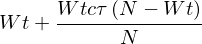

In [4]:
Wtt

To understand the dynamics of this process it is enough study how $P_{enc}$ changes as $W_t$ increases. 

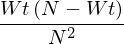

In [5]:
Penc

First, let's see what happens when $W_t$ is small and $N$ is large.

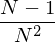

In [6]:
Penc.subs([(Wt,1)])

In [7]:
Penc.subs([(Wt,1)]).subs([(N-1,N)])

Or you can do it in one step

In [8]:
Penc.subs([(Wt,1),(N-1,N)])

Thus, when $W_t$ is small, the probability of encountering someone who is sick is low. What happens when $W_t$ is large, i.e. $W_t\approx N$?

In [9]:
Penc.subs([(Wt,N)])

Zero?? How come?! The reason is simple (and symmetric): in this case the probability of encountering someone who is *healthy* is very low, hence the probability of an encouter between a sick person and a health person is low. To complete the picture, let's check what happens when $W_t=N/2$

In [10]:
Penc.subs([(Wt,N/2)])

Ha!

For completeness let's put down some assumptions and graph $W_t$ over time. Assume N=100, $\tau=0.5$ (which is very high). Start with only on person sick, i.e. $W_0=1$. Let $c=0.5$ too.

In [11]:
Wupdate=Wtt.subs([(N,100),(tau,0.5),(c,0.5)])

In [12]:
ws=[1]
for t in range(0,49):
    ws.append(Wupdate.subs([(Wt,ws[-1:][0])]))

In [13]:
%matplotlib notebook

In [14]:
import matplotlib.pyplot as plt

In [15]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


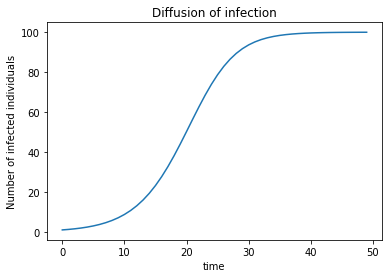

In [16]:
plt.plot(range(0,50),ws)
plt.ylabel('Number of infected individuals')
plt.xlabel('time')
plt.title('Diffusion of infection');

As Scott Page explains in his lecture, what we see here is simply an accelarting process, not a tipping point. This accelaration matches the expectation we developed earlier by studying algebracially the properties of $P_{enc}$.

## The SIS model

We now turn to the SIS model (Susceptible-Infected-Susceptible). The difference is that now infected individuals can become cured, and reutrn to the pool of susceptible individuals (thus, being sick does not make you immune to subsequent reinfection). The difference consists solely of adding a term to $W_{t+1}$ measuring the numer of cured inviduals. Let $a$ be the rate of being cured.

In [17]:
a = sm.symbols('a',negative=False, real=True)
Wtt_sis = sm.symbols('Wtt_sis',cls=sm.Function)
Wtt_sis = Wtt - a*Wt

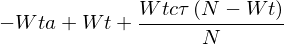

In [18]:
Wtt_sis

We are just interested in the change, so let's simplify things a bit:

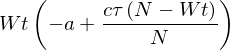

In [19]:
change=sm.collect(Wtt_sis -Wt,Wt)
change

Now assume $Wt<<N$

In [20]:
change.subs([(N-Wt,N)])

so the number of infections will increase (i.e., the infection will spread) if $c\tau-a>0$, or $c\tau/a>1$. This number $R_0=c\tau/a$ is called the **Basic reproduction number**. If it is bigger than 1, the disease spreads. This (as opposed to that we saw in the diffusion model) is a true *tipping point*. $R_0$ values for several well-known diseases (via Wikipedia): Measles - 12-18; Mumps - 4-7; HIV - 2-5; Flu - 2-3; Ebola - 1.5-2.5. Ouch!

### Vaccines

Assuming a vaccine is 100% effective, we should check $r_0=R_0(1-v)$, where $v$ is the proportion of the population that is vaccinated (making $1-v$ the proportion of individuals who are not vaccinated) instead of $R_0$. If you are not sure why, review the expression used to derive $R_0$. For vaccination to be effective we need $R_0(1-v)<1$ 

In [21]:
v,R = sm.symbols('v,R',negative=False, real=True)
R*(1-v)<1

Thus

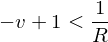

In [22]:
1-v<1/R

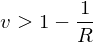

In [23]:
v>1-1/R

$v$ has to be above this threshold for vaccination to be effective in stopping the spread othe disease. Below that number there is no population level effect ("herd immunity"). That's the key result: the beneifts do not increase linearly, with each vaccinated inidividual improving the protection of the population by the same amount. There's a tipping point, which depends on $R_0$. Thus, for measles, we need:

In [24]:
1-(1.0/18)

or essentially 95% of the population to be vaccinated to get herd immunity. This has profound policy implications.
To be provocative: If you, as a health official, know that this number is unatainable (e.g., because too many people decide not to vaccinate their kids for some reason) -- should you recommend stopping the program to mandate vaccinatons on everyone else?

## Plotting the SIS curve

Let's compare the spread of the infection in the original model and in the SIS model.

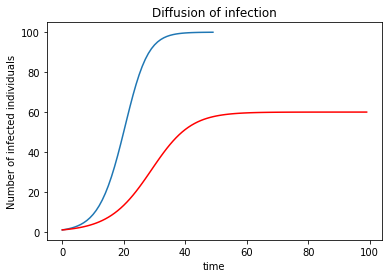

In [25]:
Wupdate_sis=Wtt_sis.subs([(N,100),(tau,0.5),(c,0.5),(a,0.1)])
ws_sis=[1]
for t in range(0,99):
    ws_sis.append(Wupdate_sis.subs([(Wt,ws_sis[-1:][0])]))
plt.plot(range(0,50),ws)
plt.plot(range(0,100),ws_sis,color='r')
plt.ylabel('Number of infected individuals')
plt.xlabel('time')
plt.title('Diffusion of infection');

# SIR

We now change the previous model, so that people who recover become immune to the disease and do not get it again. This version is called the SIR model (S for the number of susceptible, I for the number of infectious, and R for the number recovered individuals). The derivation is essentially the same as before.

In [26]:
Rt = sm.symbols('Rt')
Rtt, Penc1 = sm.symbols('Rtt,Penc1',cls=sm.Function)

In [27]:
# Penc = (Wt/N)*((N - Wt)/N)
Penc1= (Wt/N)*((N - Rt - Wt)/N)

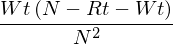

In [28]:
Penc1

In [29]:
Wtt_sir = sm.symbols('Wtt_sir',cls=sm.Function)

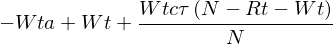

In [30]:
Wtt_sir=N*c*Penc1*tau + Wt - a*Wt
Wtt_sir

In [31]:
Rtt = Rt + a * Wt
Rtt

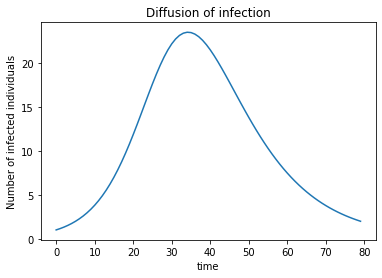

In [32]:
Wupdate_sir=Wtt_sir.subs([(N,100),(tau,0.5),(c,0.5),(a,0.1)])
Rupdate= Rtt.subs([(a,0.1)])
ws_sir=[1]
Rt_v = 0
for t in range(0,79):
    ws_sir.append(Wupdate_sir.subs([(Wt,ws_sir[-1:][0]),(Rt,Rt_v)]))
    Rt_v = Rupdate.subs([(Wt,ws_sir[-1:][0]),(Rt,Rt_v)])
plt.plot(range(0,80),ws_sir)
plt.ylabel('Number of infected individuals')
plt.xlabel('time')
plt.title('Diffusion of infection');

The following image uses the qualitative conclusions from this model to argue why protective measures during an outbreak (like washing hands, quarantine, canceling events) is heplful. It delays the spread of the disease and reduces the height of the peak. This reduces the risk of overrunning the capacity of the health care system (which, itself, can increase spread) and giving it more time to prepare. 

![The value of protective measures](https://pbs.twimg.com/media/ESas8tHVAAAhr_I?format=jpg&name=4096x4096)

See the [following thread](https://twitter.com/CT_Bergstrom/status/1235865328074153986) for discussion.

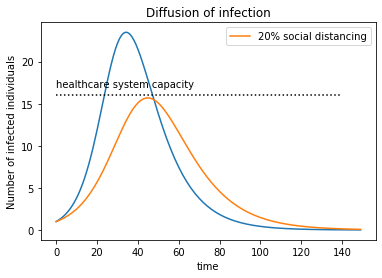

In [33]:
Wtt_sir,Penc1 = sm.symbols('Wtt_sir,Penc1',cls=sm.Function)
Penc1= (Wt/N)*((N - Rt - Wt)/N)
Wtt_sir=N*c*Penc1*tau + Wt - a*Wt
Wupdate_sir=Wtt_sir.subs([(N,100),(tau,0.5),(c,0.5),(a,0.1)])
Rupdate= Rtt.subs([(a,0.1)])
ws_sir=[1]
Rt_v = 0
for t in range(0,149):
    ws_sir.append(Wupdate_sir.subs([(Wt,ws_sir[-1:][0]),(Rt,Rt_v)]))
    Rt_v = Rupdate.subs([(Wt,ws_sir[-1:][0]),(Rt,Rt_v)])
#plt.plot(range(0,80),ws_sir)
#plt.ylabel('Number of infected individuals')
#plt.xlabel('time')
#plt.title('Diffusion of infection')

Wtt_sir2,Penc2 = sm.symbols('Wtt_sir2,Penc2',cls=sm.Function)
Penc2= (Wt/N)*((N - Rt - Wt)/N) * 0.80
Wtt_sir2=N*c*Penc2*tau + Wt - a*Wt
Wupdate_sir2=Wtt_sir2.subs([(N,100),(tau,0.5),(c,0.5),(a,0.1)])

ws_sir2=[1]
Rt_v = 0
for t in range(0,149):
    ws_sir2.append(Wupdate_sir2.subs([(Wt,ws_sir2[-1:][0]),(Rt,Rt_v)]))
    Rt_v = Rupdate.subs([(Wt,ws_sir2[-1:][0]),(Rt,Rt_v)])
plt.plot(range(0,150),ws_sir)
plt.plot(range(0,150),ws_sir2)
plt.gca().get_lines()[1].set_label('20% social distancing')
plt.plot((0,140),(16,16),color='k',linestyle=':')
plt.text(0,17,"healthcare system capacity")
plt.ylabel('Number of infected individuals')
plt.xlabel('time')
plt.title('Diffusion of infection')
plt.legend();

Our next two steps are for better communicating the results of the model. We first show how to make the graph interactive, so the user can change the degree of social isolation and see the effects. Next we create a gif animation showing how the spread of the epidemic changes as social isolation measures are increased. This gif can then be posted to social media, for example.

In [45]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

@interact(percent=(0.,1.))
def compare(percent=0.8):
    Wtt_sir,Penc1 = sm.symbols('Wtt_sir,Penc1',cls=sm.Function)
    Penc1= (Wt/N)*((N - Rt - Wt)/N)
    Wtt_sir=N*c*Penc1*tau + Wt - a*Wt
    Wupdate_sir=Wtt_sir.subs([(N,100),(tau,0.5),(c,0.5),(a,0.1)])
    Rupdate= Rtt.subs([(a,0.1)])
    ws_sir=[1]
    Rt_v = 0
    for t in range(0,149):
        ws_sir.append(Wupdate_sir.subs([(Wt,ws_sir[-1:][0]),(Rt,Rt_v)]))
        Rt_v = Rupdate.subs([(Wt,ws_sir[-1:][0]),(Rt,Rt_v)])
    #plt.plot(range(0,80),ws_sir)
    #plt.ylabel('Number of infected individuals')
    #plt.xlabel('time')
    #plt.title('Diffusion of infection')

    Wtt_sir2,Penc2 = sm.symbols('Wtt_sir2,Penc2',cls=sm.Function)
    Penc2= (Wt/N)*((N - Rt - Wt)/N) * percent
    Wtt_sir2=N*c*Penc2*tau + Wt - a*Wt
    Wupdate_sir2=Wtt_sir2.subs([(N,100),(tau,0.5),(c,0.5),(a,0.1)])

    ws_sir2=[1]
    Rt_v = 0
    for t in range(0,149):
        ws_sir2.append(Wupdate_sir2.subs([(Wt,ws_sir2[-1:][0]),(Rt,Rt_v)]))
        Rt_v = Rupdate.subs([(Wt,ws_sir2[-1:][0]),(Rt,Rt_v)])
    plt.plot(range(0,150),ws_sir)
    plt.plot(range(0,150),ws_sir2)
    plt.gca().get_lines()[1].set_label('{:.2f} social distancing'.format(1-percent))
    plt.plot((0,140),(16,16),color='k',linestyle=':')
    plt.text(0,17,"healthcare system capacity")
    plt.ylabel('Number of infected individuals')
    plt.xlabel('time')
    plt.title('Diffusion of infection')
    plt.legend()

interactive(children=(FloatSlider(value=0.8, description='percent', max=1.0), Output()), _dom_classes=('widget…

In [46]:
import gif

In [47]:
@gif.frame 
def compare(percent=0.8):
    Wtt_sir,Penc1 = sm.symbols('Wtt_sir,Penc1',cls=sm.Function)
    Penc1= (Wt/N)*((N - Rt - Wt)/N)
    Wtt_sir=N*c*Penc1*tau + Wt - a*Wt
    Wupdate_sir=Wtt_sir.subs([(N,100),(tau,0.5),(c,0.5),(a,0.1)])
    Rupdate= Rtt.subs([(a,0.1)])
    ws_sir=[1]
    Rt_v = 0
    for t in range(0,149):
        ws_sir.append(Wupdate_sir.subs([(Wt,ws_sir[-1:][0]),(Rt,Rt_v)]))
        Rt_v = Rupdate.subs([(Wt,ws_sir[-1:][0]),(Rt,Rt_v)])
    #plt.plot(range(0,80),ws_sir)
    #plt.ylabel('Number of infected individuals')
    #plt.xlabel('time')
    #plt.title('Diffusion of infection')

    Wtt_sir2,Penc2 = sm.symbols('Wtt_sir2,Penc2',cls=sm.Function)
    Penc2= (Wt/N)*((N - Rt - Wt)/N) * percent
    Wtt_sir2=N*c*Penc2*tau + Wt - a*Wt
    Wupdate_sir2=Wtt_sir2.subs([(N,100),(tau,0.5),(c,0.5),(a,0.1)])

    ws_sir2=[1]
    Rt_v = 0
    for t in range(0,149):
        ws_sir2.append(Wupdate_sir2.subs([(Wt,ws_sir2[-1:][0]),(Rt,Rt_v)]))
        Rt_v = Rupdate.subs([(Wt,ws_sir2[-1:][0]),(Rt,Rt_v)])
    plt.plot(range(0,150),ws_sir)
    plt.plot(range(0,150),ws_sir2)
    plt.gca().get_lines()[1].set_label('{:.2f} social distancing'.format(1-percent))
    plt.plot((0,140),(16,16),color='k',linestyle=':')
    plt.text(0,17,"healthcare system capacity")
    plt.ylabel('Number of infected individuals')
    plt.xlabel('time')
    plt.title('Diffusion of infection')
    plt.legend()

In [55]:
frames = []
for p in range(11):
    frame=compare(1 - 0.1*p)
    frames.append(frame)

In [56]:
gif.save(frames, "contagion.gif", duration=350)